In [19]:
import pandas as pd
import numpy as np
df= pd.read_pickle('../../data/Performance Leaders/univ_cumulative_returns_multihorizon_250_20230918.pkl')
df=df.drop(columns =['DATE'])
df = df[df['niche'].isin(['Growth','Broad-based','Value'])]
df = df[df['focus'].isin(['Large Cap','Mid Cap','Small Cap','Total Market','Extended Market'])]
df=df.replace('',np.nan)
df

cum_ret_0Y  cum_ret_0Q  cum_ret_0M UNIVERSE  \
DATE       lss_ticker                                                
12/30/2022 SWPPX-US      0.000000         NaN         NaN    SWPPX   
           JLGMX-US      0.000000         NaN         NaN    JLGMX   
           DFQTX-US      0.000000         NaN         NaN    DFQTX   
           DFEOX-US      0.000000         NaN         NaN    DFEOX   
           DFIEX-US      0.000000         NaN         NaN    DFIEX   
...                           ...         ...         ...      ...   
09/15/2023 FVADX-US      3.470917   -1.938124   -2.904928    FVADX   
           JAEDX-US     36.293433    0.857148   -1.553784    JAEDX   
           SVSPX-US     17.223602    0.330005   -1.211123    SVSPX   
           ACIPX-US     -0.040623   -3.172593   -1.293652    ACIPX   
           CABDX-US      5.290102    1.983471   -0.161812    CABDX   

                                                                name   price  \
DATE       lss_ticker                                                          
12/30/2022 SWPPX-US                             Schwab Capital Trust   69.75   
           JLGMX-US                                 JPMorgan Trust I   59.33   
           DFQTX-US                   DFA US Core Equity 2 Portfolio   30.80   
           DFEOX-US                   DFA US Core Equity 1 Portfolio   34.12   
           DFIEX-US          DFA International Core Equity Portfolio   14.63   
...                                                              ...     ...   
09/15/2023 FVADX-US                   Franklin Value Investors Trust   56.80   
           JAEDX-US            Hancock John Variable Insurance Trust   25.10   
           SVSPX-US                                       SSGA Funds  236.97   
           ACIPX-US    American Century Mid Cap Value Fund - G Class   15.46   
           CABDX-US                           AB Relative Value Fund    6.18   

                                aum ffd_bmk_id         ffd_brand  \
DATE       lss_ticker                                              
12/30/2022 SWPPX-US    7.462342e+10       SP50            Schwab   
           JLGMX-US    4.126916e+10    R.1000G          JPMorgan   
           DFQTX-US    3.097797e+10     R.3000               DFA   
           DFEOX-US    3.047367e+10     R.3000               DFA   
           DFIEX-US    2.985577e+10     991000               DFA   
...                             ...        ...               ...   
09/15/2023 FVADX-US    1.342501e+09    R.2000V          Franklin   
           JAEDX-US    1.333482e+09       SP50      John Hancock   
           SVSPX-US    1.332163e+09       SP50      State Street   
           ACIPX-US    1.328240e+09     R.MIDV  American Century   
           CABDX-US    1.328236e+09    R.1000V          AB Funds   

                              focus                                  segment  \
DATE       lss_ticker                                                          
12/30/2022 SWPPX-US       Large Cap               Equity: U.S.  -  Large Cap   
           JLGMX-US       Large Cap       Equity: Global  - Large Cap Growth   
           DFQTX-US    Total Market            Equity: U.S.  -  Total Market   
           DFEOX-US    Total Market            Equity: U.S.  -  Total Market   
           DFIEX-US    Total Market  Equity: Global Ex-U.S.  -  Total Market   
...                             ...                                      ...   
09/15/2023 FVADX-US       Small Cap         Equity: U.S.  -  Small Cap Value   
           JAEDX-US    Total Market       Equity: U.S. - Total Market Growth   
           SVSPX-US       Large Cap               Equity: U.S.  -  Large Cap   
           ACIPX-US         Mid Cap           Equity: U.S.  -  Mid Cap Value   
           CABDX-US    Total Market      Equity: U.S.  -  Total Market Value   

                             niche   class        category  
DATE       lss_ticker                                       
12/30/2022 SWPPX-US    

In [20]:
df = df.reset_index()
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE',ascending = True)

In [21]:
df

,DATE,lss_ticker,cum_ret_0Y,cum_ret_0Q,cum_ret_0M,UNIVERSE,name,price,aum,ffd_bmk_id,ffd_brand,focus,segment,niche,class,category
0,2022-12-30,SWPPX-US,0.000000,NaN,NaN,SWPPX,Schwab Capital Trust,69.75,7.462342e+10,SP50,Schwab,Large Cap,Equity: U.S. - Large Cap,Broad-based,Equity,Size and Style
147,2022-12-30,ADX-US,0.000000,NaN,NaN,ADX,Adams Diversified Equity Fund Incorporated,17.63,2.471080e+09,NOINDEX,Adams,Large Cap,Equity: U.S. - Large Cap,Broad-based,Equity,Size and Style
148,2022-12-30,TILWX-US,0.000000,NaN,NaN,TILWX,TIAA-CREF Funds,21.83,2.444113e+09,R.1000G,TIAA,Large Cap,Equity: U.S. - Large Cap Growth,Growth,Equity,Size and Style
149,2022-12-30,PINZX-US,0.000000,NaN,NaN,PINZX,Principal Funds Incorporated,10.77,2.431962e+09,105834,Principal,Total Market,Equity: Global Ex-U.S. - Total Market Value,Value,Equity,Size and Style
150,2022-12-30,LGLIX-US,0.000000,NaN,NaN,LGLIX,Lord Abbett Securities Trust,32.21,2.422153e+09,R.1000G,Lord Abbett,Total Market,Equity: Global - Total Market Growth,Growth,Equity,Size and Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43001,2023-09-15,HHHFX-US,4.470435,-2.503214,-0.065817,HHHFX,Hartford Mutual Funds II,15.20,5.375155e+09,891800,Hartford,Total Market,Equity: Emerging Markets - Total Market,Broad-based,Equity,Size and Style
43002,2023-09-15,JMGMX-US,12.138290,-2.602312,-2.796891,JMGMX,JPMorgan Trust II,45.05,5.275424e+09,R.MIDG,JPMorgan,Mid Cap,Equity: U.S. - Mid Cap Growth,Growth,Equity,Size and Style
43003,2023-09-15,BGRIX-US,10.690683,-0.103778,-0.661919,BGRIX,Baron Investment Funds Trust,99.71,5.263083e+09,R.2000G,Baron,Small Cap,Equity: U.S. - Small Cap Growth,Growth,Equity,Size and Style
42991,2023-09-15,OAKIX-US,13.993920,-2.887816,-1.242468,OAKIX,Oakmark International Fund,26.56,6.291678e+09,991000,Oakmark,Total Market,Equity: Global Ex-U.S. - Total Market Value,Value,Equity,Size and Style


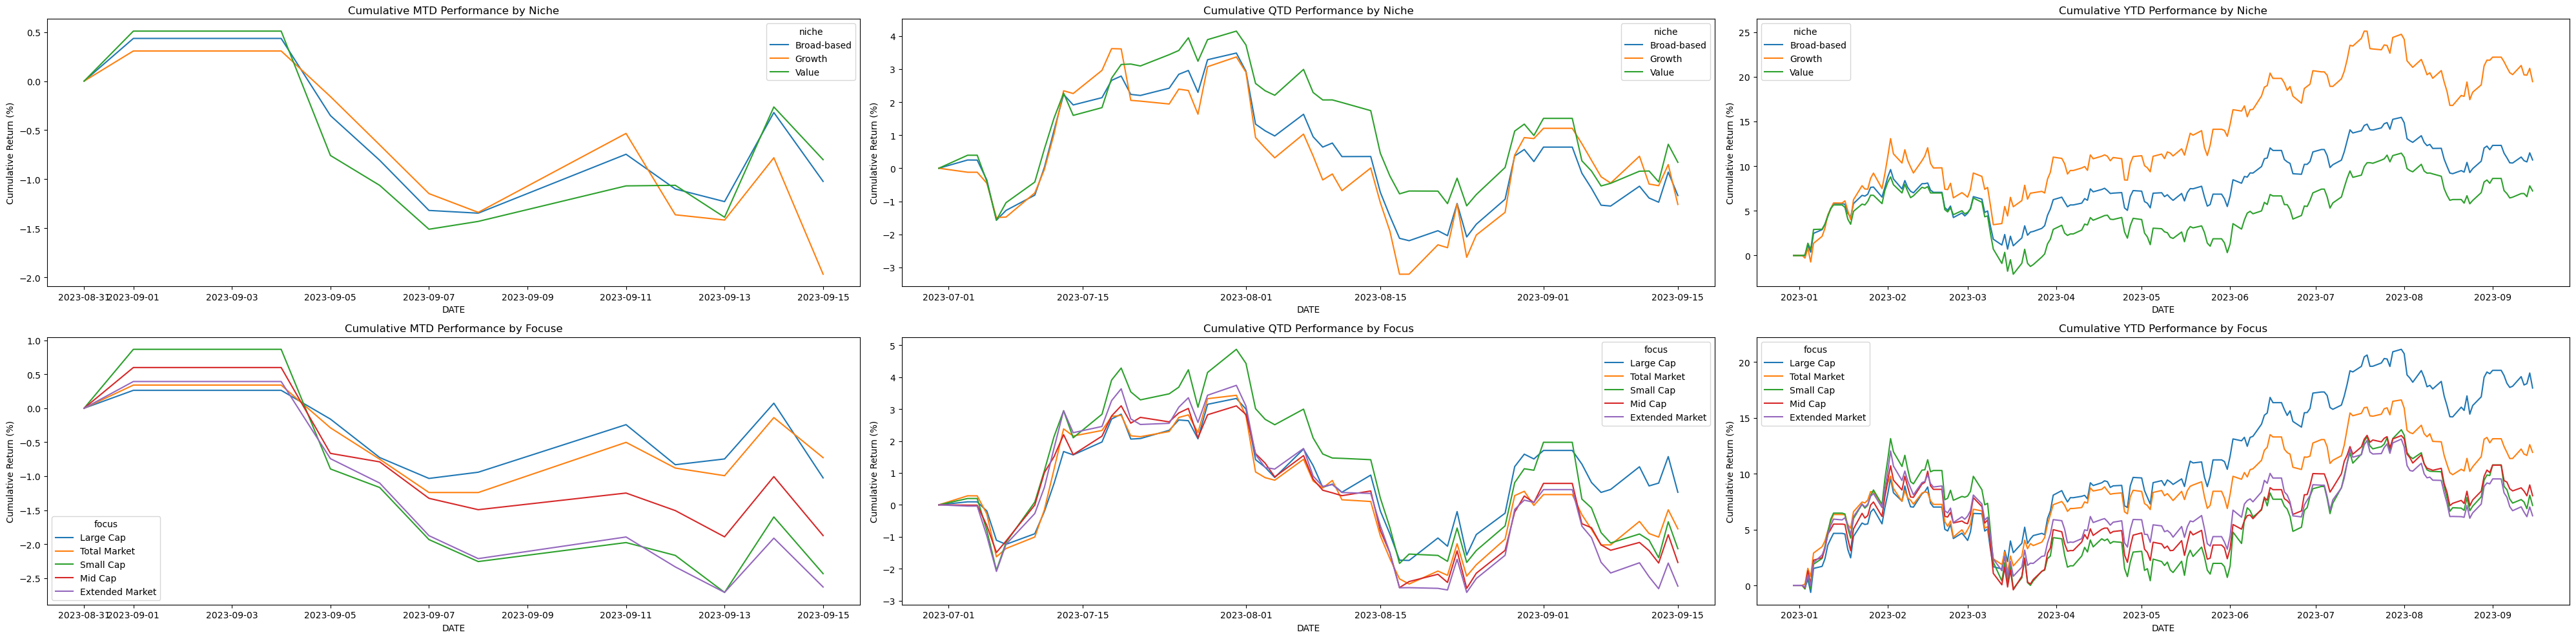

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs= plt.subplots(2,3,figsize = (40,10))

sns.lineplot(data=df,x='DATE',y = 'cum_ret_0M', hue= 'niche',ax=axs[0,0],errorbar=None)
axs[0,0].set_title('Cumulative MTD Performance by Niche')
axs[0,0].set_ylabel('Cumulative Return (%)')

sns.lineplot(df,x ="DATE",y= 'cum_ret_0Q', hue= 'niche',ax=axs[0,1],errorbar=None)
axs[0,1].set_title('Cumulative QTD Performance by Niche')
axs[0,1].set_ylabel('Cumulative Return (%)')

sns.lineplot(df,x='DATE',y = 'cum_ret_0Y', hue= 'niche',ax=axs[0,2],errorbar=None)
axs[0,2].set_title('Cumulative YTD Performance by Niche')
axs[0,2].set_ylabel('Cumulative Return (%)')

sns.lineplot(data=df,x='DATE',y = 'cum_ret_0M', hue= 'focus',ax=axs[1,0],errorbar=None)
axs[1,0].set_title('Cumulative MTD Performance by Focuse')
axs[1,0].set_ylabel('Cumulative Return (%)')

sns.lineplot(df,x ="DATE",y= 'cum_ret_0Q', hue= 'focus',ax=axs[1,1],errorbar=None)
axs[1,1].set_title('Cumulative QTD Performance by Focus')
axs[1,1].set_ylabel('Cumulative Return (%)')

sns.lineplot(df,x='DATE',y = 'cum_ret_0Y', hue= 'focus',ax=axs[1,2],errorbar=None)
axs[1,2].set_title('Cumulative YTD Performance by Focus')
axs[1,2].set_ylabel('Cumulative Return (%)')
plt.savefig('indexed_performance.png')
plt.tight_layout()

In [25]:
df_last = df.set_index(['DATE','lss_ticker']).unstack().tail(1).stack().dropna(how='any')

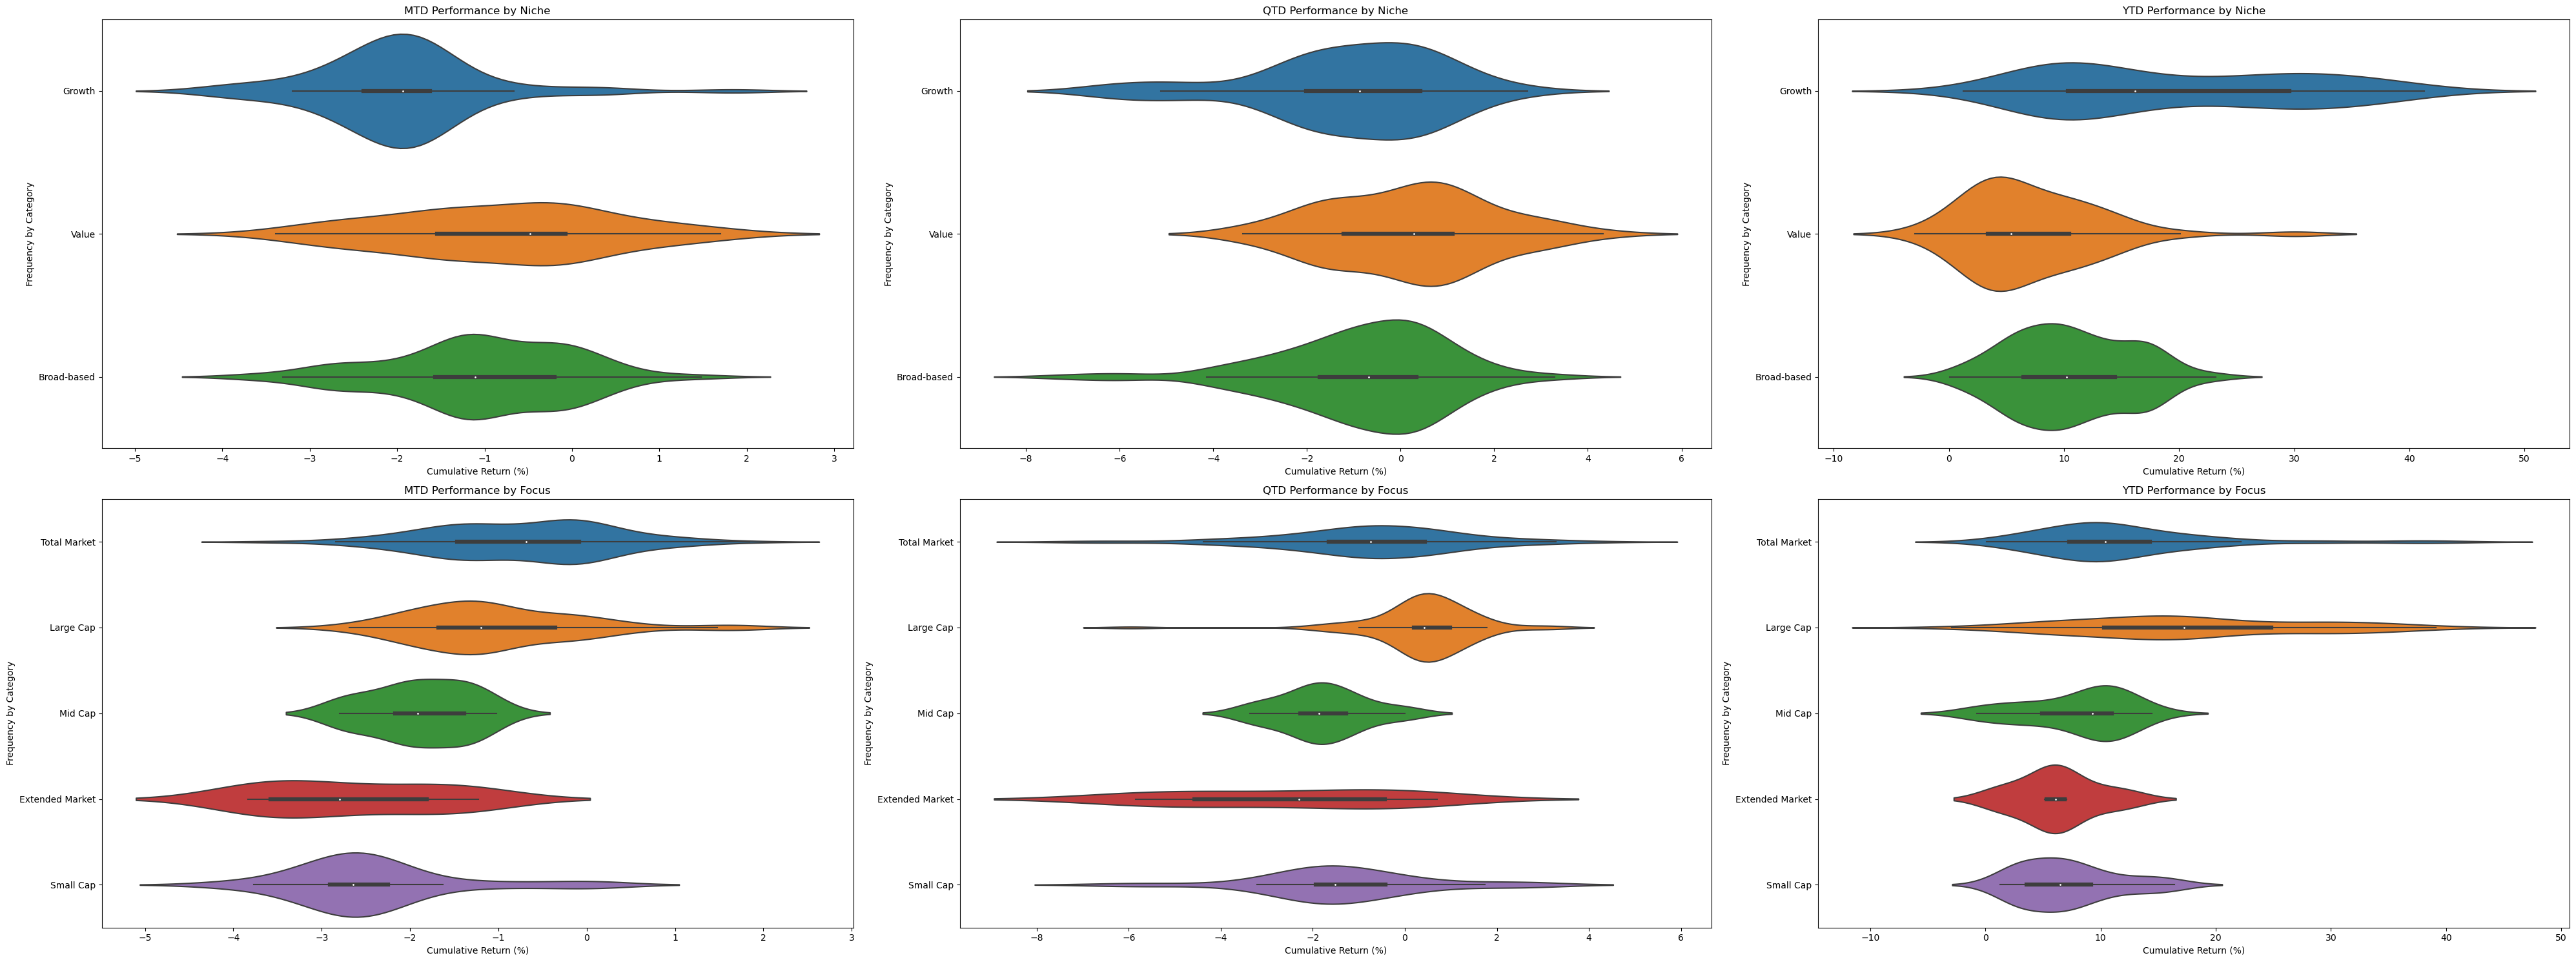

In [26]:
fig,axs= plt.subplots(2,3,figsize = (40,15))

sns.violinplot(df_last,x = 'cum_ret_0M',y='focus',ax=axs[1,0])
sns.violinplot(df_last,x = 'cum_ret_0M',y='niche',ax=axs[0,0])

sns.violinplot(df_last,x = 'cum_ret_0Q',y='focus',ax=axs[1,1])
sns.violinplot(df_last,x = 'cum_ret_0Q',y='niche',ax=axs[0,1])


sns.violinplot(df_last,x = 'cum_ret_0Y',y='focus',ax=axs[1,2])
sns.violinplot(df_last,x = 'cum_ret_0Y',y='niche',ax=axs[0,2])


axs[0,0].set_title('MTD Performance by Niche')
axs[0,0].set_xlabel('Cumulative Return (%)')
axs[0,0].set_ylabel('Frequency by Category')

axs[1,0].set_xlabel('Cumulative Return (%)')
axs[1,0].set_ylabel('Frequency by Category')
axs[1,0].set_title('MTD Performance by Focus')

axs[0,1].set_title('QTD Performance by Niche')
axs[0,1].set_xlabel('Cumulative Return (%)')
axs[0,1].set_ylabel('Frequency by Category')

axs[1,1].set_title('QTD Performance by Focus')
axs[1,1].set_xlabel('Cumulative Return (%)')
axs[1,1].set_ylabel('Frequency by Category')

axs[0,2].set_title('YTD Performance by Niche')
axs[0,2].set_xlabel('Cumulative Return (%)')
axs[0,2].set_ylabel('Frequency by Category')

axs[1,2].set_title('YTD Performance by Focus')
axs[1,2].set_xlabel('Cumulative Return (%)')
axs[1,2].set_ylabel('Frequency by Category')
plt.savefig('performance_distributions.png')
plt.tight_layout()